# E-commerce — Выявление профилей потребления для интернет-магазина товаров для дома «Пока все ещё тут».

## Декомпозиция задачи 

### Описание проекта и общее описание данных.
### Изучение общей информации о данных.
### Предобработка данных. 
Цель шага - подготовить данные к дальнейшему анализу.
   
#### Проверить:
   - корректность названия колонок датасета. Переименовать при необходимости.
   - наличие пропусков и дубликатов. Удалить дубликаты, заполнить пропуски если возможно.
   - корректность типов данных колонок датасета. Привести типы к более подходящим

#### Проверить набор данных на наличие выбросов:
   - заказы с очень большой или, наоборот, очень маленькой общей стоимостью
   - заказы с большим числом товаров
   - пользователи с большим числом заказов

#### Очистить данные от выбросов, чтобы они не влияли на дальнейший анализ.
   
   
### Исследовательский анализ данных.
    
#### Провести анализ распределения для метрик, построить диаграммы:
   - число заказов на одного покупателя. Определить, характерны ли повторные покупки для покупателей.
   - распределение заказов месяцам. Определить, есть ли сезонность в продаже товаров.
   - распределение заказов по времени дня и по дням недели. Определить, есть ли пиковые часы/дни продаж.
   - число товаров в заказе.
   - распределение заказов по среднему чеку.
   - определить top10 товаров - лидеров продаж

#### По данным о товарах в заказах сформировать список товарных категорий. Провести анализ для метрик, построить диаграммы:
   - определить, есть ли сезонность продаж с учетом категорий товаров
   - определить top10 категорий товаров - лидеров продаж по числу покупок и общей стоимости
   
### Сегментация покупателей.

Цель шага - сделать сегментацию покупателей по различным признакам для дальнейшего использования в маркетинговых активностях.

#### Выделить сегменты покупателей:
   - по числу заказов на одного покупателя. 
   - по категориям товаров
   - по среднему чеку. 
   
### Проверка гипотез.
Цель шага - сформулировать и проверить гипотезы, на основе них составить рекомендации.

### Выводы и рекомендации.
### Ссылка на презентацию.
### Ссылка на дашборд.

## Описание проекта 

### Задача 
Сегментировать покупателей по профилю потребления.

### Описание шагов для решения задачи:
**1. Проведем исследовательский анализ данных.**

**2. Сегментируем покупателей на основе истории их покупок.**
Не бойтесь выдвигать собственные варианты сегментации покупателей. Задумайтесь о том как сегментация может помочь в разработке более персонализированных предложений для покупателей?
Попробуйте сформировать сегменты на основе того, что покупают пользователи. Для этого вы можете проанализировать их покупки и сегментировать товары на основе принадлежности к той или иной товарной категории.

**3. Сформулируем и проверим статистические гипотезы.**

### Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

### Ход исследования:
1. Общее описание проекта и данных;
2. Загрузка библиотек;
3. Изучение общей информации о данных;
4. Предобработка данных;
5. Исследовательский анализ данных;
6. Статистический анализ данных; 
7. Общие выводы и рекомендации;
8. Ссылка на презентацию;
9. Ссылка на файл с дашбордом.

## Изучение общей информации о данных. 

In [1]:
#проигнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
#выгрузка библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy import stats as st
from math import ceil
import math as mth
from collections import Counter
import re
from plotly import graph_objects as go
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
#настраиваем отображение всех столбцов и строк выводимых таблиц
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# текст в ячейке отражается полностью вне зависимости от длины
pd.set_option('display.max_colwidth', -1)                   

In [4]:
# чтение файла с данными и сохранение в ecommerce
ecommerce = pd.read_csv('/datasets/ecommerce_dataset.csv')
ecommerce.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [5]:
# получение общей информации о данных в таблице 
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [6]:
#посчитаем явные дубликаты 
ecommerce.duplicated().sum()

0

**Вывод:** 
1. В датасете 6737 записей, 
2. Пропусков нет, 
3. Названия колонок корректные, 
4. Явных дубликатов нет. 
5. Данные представлены в типах целых чисел(date, order_id, quantity), вещественных чисел(price)  и строк(customer_id, product). Некорректный тип данных в дате.
6. Возможно, присутствуют дубликаты в столбце с наименованием товара. 

## Предобработка данных.

### Изменение типов данных. 

In [7]:
#преобразуем дату в формат datetime и выделим отдельный столбец с месяцем 'month'
ecommerce['month'] = pd.to_datetime(ecommerce['date'], format='%Y%m', exact=False)
ecommerce['date'] = pd.to_datetime(ecommerce['date'], format='%Y%m%d', exact=False)
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
 6   month        6737 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 368.6+ KB


In [8]:
ecommerce.head()

,date,customer_id,order_id,product,quantity,price,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01


### Обработка неявных дубликатов.  

In [9]:
# дубликаты товаров в одном заказе одного покупателя
ecommerce[ecommerce.duplicated(subset=['customer_id', 'order_id', 'product'])].count()

date           1886
customer_id    1886
order_id       1886
product        1886
quantity       1886
price          1886
month          1886
dtype: int64

In [10]:
ecommerce[ecommerce.duplicated(subset=['customer_id', 'order_id', 'product'])].sort_values(by=['order_id', 'product']).head(20)

,date,customer_id,order_id,product,quantity,price,month
376,2018-10-23,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,2018-10-01
509,2018-10-28,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,2018-10-01
588,2018-11-02,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,2018-11-01
758,2018-11-10,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,2018-11-01
816,2018-11-15,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,2018-11-01
827,2018-11-16,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,2018-11-01
377,2018-10-23,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,2018-10-01
510,2018-10-28,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,2018-10-01
589,2018-11-02,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,2018-11-01
759,2018-11-10,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,2018-11-01


В датасете есть заказы, которые повторяются по несколько раз, но с разными датами. Оставим только первые записи по задублированным заказам

In [11]:
ecommerce.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='first', inplace=True)
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 6735
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4851 non-null   datetime64[ns]
 1   customer_id  4851 non-null   object        
 2   order_id     4851 non-null   int64         
 3   product      4851 non-null   object        
 4   quantity     4851 non-null   int64         
 5   price        4851 non-null   float64       
 6   month        4851 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 303.2+ KB


In [12]:
ecommerce[ecommerce.duplicated()]

,date,customer_id,order_id,product,quantity,price,month


Удалены задублированные записи по заказам.

### Проверка данных на наличие выбросов.

In [13]:
# общая стоимость одной позиции заказа
ecommerce['amount'] = ecommerce['price'] * ecommerce['quantity']

In [14]:
def describe_orders():
    df = ecommerce.groupby('order_id').agg({'amount': 'sum', 'quantity': 'sum', 'customer_id': 'count'})
    df.columns = ['price_total', 'items_count', 'goods_count']
    print(df.describe())
    
    return df

In [15]:
df = describe_orders()

         price_total  items_count  goods_count
count  2784.000000    2784.000000  2784.000000
mean   1483.696480    4.937500     1.742457   
std    12964.143331   24.061733    2.796766   
min    14.000000      1.000000     1.000000   
25%    289.750000     1.000000     1.000000   
50%    689.000000     1.000000     1.000000   
75%    1473.500000    3.000000     1.000000   
max    675000.000000  1000.000000  51.000000  


Всего у нас данные по 2784 заказам. Средний чек - примерно 1500 руб, в большинстве заказов только одна позиция и менее 3 единиц товара. 
Удалим заказы, в которых более 30 единиц товара. Таких заказов единицы, они не вписываются в общую картину и искажают метрики. Порог в 30 единиц выбран экспертно. 

In [16]:
df = df.query('items_count > 30').reset_index()

ecommerce = ecommerce[~ecommerce['order_id'].isin(df['order_id'])]
df = describe_orders()

        price_total  items_count  goods_count
count  2733.000000   2733.000000  2733.000000
mean   1142.262715   3.140871     1.669228   
std    1735.795400   4.903489     2.371514   
min    14.000000     1.000000     1.000000   
25%    277.000000    1.000000     1.000000   
50%    674.000000    1.000000     1.000000   
75%    1408.000000   3.000000     1.000000   
max    47385.000000  30.000000    30.000000  


In [17]:
#посмотрим распределение заказов по покупателям 
orders_by_customer = ecommerce.groupby('customer_id').agg({'order_id': 'nunique'}).reset_index()
orders_by_customer.columns = ['customer_id', 'orders_count']
orders_by_customer.describe()

,orders_count
count,2403.000000
mean,1.149397
std,2.650889
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,125.000000


Большинство покупателей совершают только один заказ. Удалим тех, кто совершил больше 10 заказов. Порог выбран экспертно. 

In [18]:
df = orders_by_customer.query('orders_count > 10')
ecommerce = ecommerce[~ecommerce['customer_id'].isin(df['customer_id'])]

In [19]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361 entries, 0 to 6734
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4361 non-null   datetime64[ns]
 1   customer_id  4361 non-null   object        
 2   order_id     4361 non-null   int64         
 3   product      4361 non-null   object        
 4   quantity     4361 non-null   int64         
 5   price        4361 non-null   float64       
 6   month        4361 non-null   datetime64[ns]
 7   amount       4361 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 306.6+ KB


**Вывод:**: Исходные данные проверены на наличие дубликатов, удалены выбросы, изменен тип данных колонки date. Данные корректные, можно приступать к анализу.
        

## Исследовательский анализ данных.

1. Проведем анализ распределения для метрик, построим диаграммы:
   - число заказов на одного покупателя. 
   - распределение заказов месяцам. 
   - распределение заказов по времени дня и по дням недели. 
   - распределение заказов по среднему чеку.
   - определим top10 товаров - лидеров продаж.
2. По данным о товарах в заказах сформируем список товарных категорий. 
3. Проведем анализ для метрик, построим диаграммы:
   - определим, есть ли сезонность продаж с учетом категорий товаров.
   - определим top10 категорий товаров - лидеров продаж по числу покупок и общей стоимости.

### Проведем анализ распределения для метрик.

<AxesSubplot:title={'center':'Число заказов на покупателя'}, ylabel='Frequency'>

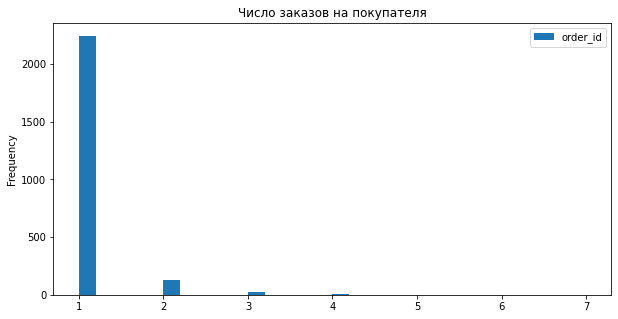

In [20]:
# определим число заказов на одного покупателя
(ecommerce.groupby('customer_id')
    .agg({'order_id': 'nunique'})
    .plot(kind='hist',
          bins=30,
          title='Число заказов на покупателя', 
          figsize=(10,5)
         ))

Большинство клиентов не совершают повторных покупок.

In [21]:
# определим период, за который представлены данные 
print('Минимальная дата:',  
      ecommerce['date'].min(), '\n'
      'Максимальная дата:', 
      ecommerce['date'].max()
     )

Минимальная дата: 2018-10-01 00:00:00 
Максимальная дата: 2019-10-31 00:00:00


У нас представлены данные с 1 октября 2018 года по 31 октября 2019 года.

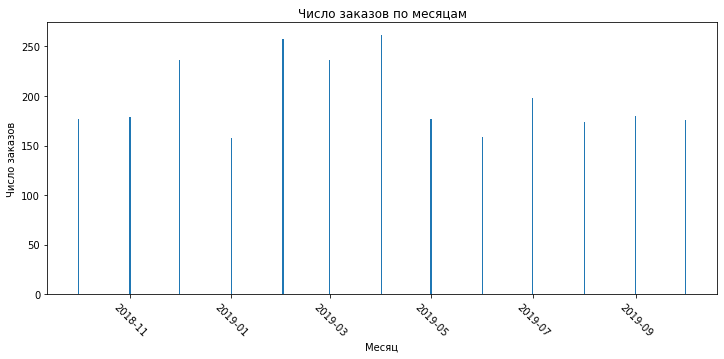

In [22]:
# распределение заказов месяцам
orders_by_month = ecommerce.groupby('month').agg({'order_id': 'nunique'}).reset_index()
orders_by_month.columns = ['month', 'orders_count']

fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot()
ax.bar(orders_by_month['month'], orders_by_month['orders_count'])
ax.set(title='Число заказов по месяцам')

ax.set_ylabel('Число заказов')
ax.set_xlabel('Месяц')
plt.xticks(rotation=-45)
plt.show()

Выраженной сезонности в общем количестве продаж (без учета категорий товаров) нет. Можно заметить увеличение продаж с февраля по апрель. 

In [23]:
# распределение заказов по дням недели
ecommerce['day'] = ecommerce['date'].dt.dayofweek
ecommerce['day_name'] = ecommerce['date'].dt.day_name()
ecommerce.head()

,date,customer_id,order_id,product,quantity,price,month,amount,day,day_name
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,0,Monday
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01,194.0,0,Monday
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,0,Monday
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,0,Monday
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,0,Monday


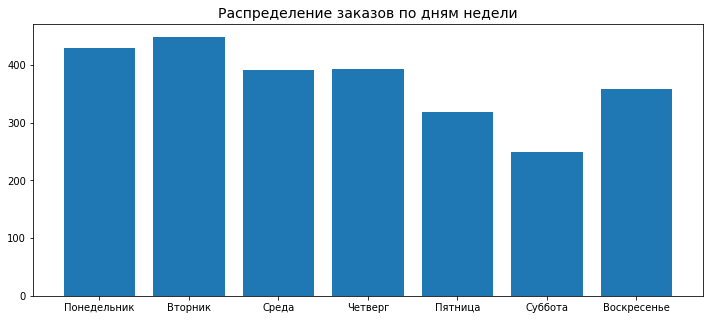

In [24]:
orders_by_day = ecommerce.groupby('day').agg({'order_id': 'nunique'}).reset_index()

plt.figure(figsize=(12,5))
plt.bar(orders_by_day['day'], 
        orders_by_day['order_id'], 
        tick_label=['Понедельник',
                    'Вторник',
                    'Среда',
                    'Четверг',
                    'Пятница',
                    'Суббота',
                    'Воскресенье']
       )
plt.title('Распределение заказов по дням недели', fontsize=14)
plt.show()

Дней недели с резким ростом числа заказов нет. Есть небольшое сокращение заказов в пятницу - субботу. Пик приходится на вторник.


In [25]:
# число товаров в заказе
count_product_order = ecommerce.groupby('order_id').agg({'product': 'nunique'}).reset_index()

print('Число заказов с одним наименованием товара: ', 
      count_product_order.query('product == 1').shape[0], 
      '\n', 
      'в % от общего числа заказов: {:.2%}'.format(count_product_order.query('product == 1').shape[0] / count_product_order.shape[0])
     )

Число заказов с одним наименованием товара:  2183 
 в % от общего числа заказов: 85.34%


<AxesSubplot:title={'center':'Число наименований товаров в заказах'}, ylabel='Frequency'>

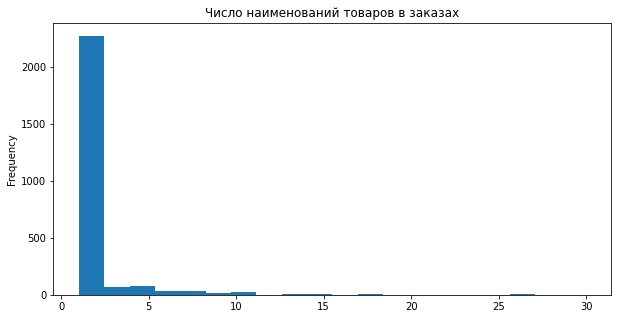

In [26]:
count_product_order['product'].plot(kind='hist',
          bins=20,
          title='Число наименований товаров в заказах', 
          figsize=(10,5)
         )

В более 85% заказов только одно наименование товара

In [27]:
# распределение заказов по среднему чеку
order_amount = ecommerce.groupby('order_id').agg({'amount': 'sum'}).reset_index()
order_amount.describe()

,order_id,amount
count,2558.000000,2558.000000
mean,64366.752541,1129.915168
std,17980.988995,1754.557652
min,12624.000000,14.000000
25%,69173.500000,268.000000
50%,70573.500000,648.500000
75%,71906.000000,1349.000000
max,73162.000000,47385.000000


<AxesSubplot:title={'center':'Средний чек'}, ylabel='Frequency'>

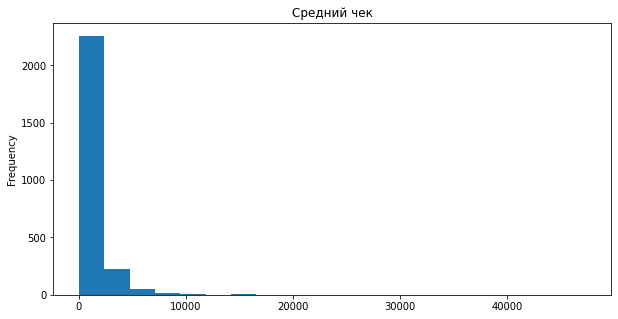

In [28]:
order_amount['amount'].plot(kind='hist',
          bins=20,
          title='Средний чек', 
          figsize=(10,5)
         )

Большинство заказов - до 5000 рублей.

In [29]:
# определить top10 товаров - лидеров продаж
goods_top10 = ecommerce.groupby('product').agg({'quantity': 'sum', 'amount': 'sum'})

print('Топ10 товаров по числу проданных единиц:')
print(goods_top10.sort_values(by='quantity', ascending=False).head(10))

print('Топ10 товаров по общей выручке:')
print(goods_top10.sort_values(by='amount', ascending=False).head(10))

Топ10 товаров по числу проданных единиц:
                                                                                quantity  \
product                                                                                    
Цветок искусственный Гвоздика пластиковая одиночная в ассортименте 50 см        96         
Щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096  90         
Ёрш унитазный с деревянной ручкой , Ваир 1712012                                85         
Однолетнее растение Петуния махровая в кассете 4 шт, Россия                     80         
Пеларгония розебудная Red Pandora укорененный черенок                           80         
Пеларгония зональная диам. 12 см красная махровая                               63         
Муляж Красное яблоко мини полиуретан d-6 см                                     63         
Пеларгония розебудная Prins Nikolai укорененный черенок                         63         
Пеларгония зональная диам. 12 см сирене

### Cформируем список товарных категорий.


In [30]:
# сформируем список всех товаров и удалим явные дубликаты 
products = ecommerce.loc[:,['product']]
products.drop_duplicates(inplace=True)
products

,product
0,"Комнатное растение в горшке Алое Вера, d12, h30"
1,"Комнатное растение в горшке Кофе Арабика, d12, h25"
2,Радермахера d-12 см h-20 см
3,Хризолидокарпус Лутесценс d-9 см
4,Циперус Зумула d-12 см h-25 см
5,Шеффлера Лузеана d-9 см
6,Юкка нитчатая d-12 см h-25-35 см
7,Настенная сушилка для белья Gimi Brio Super 100
8,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056"
10,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331"


Ниже создадим словари ключевых слов для распознования той или иной категроии. 


In [31]:
# растения
plants = ['Агератум', 'Адиантум', 'Азалия', 'Азалия', 'Аквилегия', 'Алиссум', 'Алоэ', 'Альбука', 'Амариллис', 'Анемона', 
          'Антуриум', 'Аптения', 'Арбуз', 'Аргирантерум', 'Артемизия', 'Аспарагус', 'Астра', 'Афеляндра', 'Бадан', 'Баклажан', 
          'Бакопа', 'Бальзамин', 'Бархатцы', 'Бегония', 'Буддлея', 'Бузульник', 'Валериана', 'Вербейник', 'Вербена', 'Вигна', 
          'Газания', 'Гайлардия', 'Гардения', 'Гвоздика', 'Георгина', 'Герань', 'Гербера', 'Гиацинт', 'Гимнокалициум', 
          'Гиностемма', 'Гипсофила', 'Глоксиния', 'Годеция', 'Горох', 'Гортензия', 'виноград', 'Декабрист', 'Дендробиум', 
          'Джункус', 'Диффенбахия', 'Драцена', 'Душица', 'Дыня', 'Ель', 'Завертка', 'Замиокулькас', 'Зверобой', 'Земляника', 
          'Змееголовник', 'Импатиенс', 'Кабачок', 'Каланхое', 'Калатея', 'Календула', 'Калибрахоа', 'Калла', 'Каллуна', 
          'Калоцефалус', 'Камнеломка', 'Кампанула', 'Капсикум', 'Капуста', 'Кипарисовик', 'Клен', 'Клубника', 'Кодонанта', 
          'Колеус', 'Колокольчик', 'Комнатное растение', 'Кореопсис', 'Космея', 'Кофе', 'Крассула', 'Лаванда', 'Лаватера', 
          'Лавр', 'Лантана', 'Лапчатка', 'Левкой', 'Лен', 'Лилейник', 'Литопс', 'Лобелия', 'Лук', 'Львиный зев', 'Любисток', 
          'Маттиола', 'Мединилла', 'Мелисса', 'Пеперомия', 'Шалфей', 'Мимоза', 'Мирт', 'Многолетнее растение', 'Молодило', 
          'Монарда', 'Морковь', 'Муррайя', 'Мускари', 'Виола', 'Крокусы', 'Мята', 'Настурция', 'Незабудка', 'Нивянник', 
          'Новогоднее дерево', 'Нолина', 'Овсянница', 'Огурец', 'Кориандр', 'Котовник', 'Однолетнее растение', 'Осина', 
          'Папоротник', 'Патиссон', 'Пахира', 'Пеларгония', 'Петрушка', 'Петуния', 'Вероника', 'Платикодон', 'Примула', 
          'Пряные травы', 'Пуансетия', 'Радермахера', 'Ранункулус', 'Роза', 'Розмарин', 'Рудбекия', 'Седум', 
          'Сельдерей', 'Синнингия', 'Смолевка', 'Соланум', 'Солидаго', 'Спатифиллум', 'Суккулент', 'Сциндапсус', 'Табак', 
          'Тимьян', 'Томат', 'Тыква', 'Тюльпан', 'Укроп', 'Фаленопсис', 'Фатсия', 'Фиалка', 'Физостегия', 'Фикус', 'Фиттония', 
          'Эхинацея', 'Флокс', 'Фуксия', 'Хамедорея', 'Хлорофитум', 'Хоста', 'Хризантема', 'Хризолидокарпус', 
          'Цветущее комнатное растение', 'Целозия', 'Цикламен', 'Цинерания', 'Циния', 'Циперус', 'Цитрофортунелла', 'Эвкалипт', 
          'Энотера', 'Цинерария', 'Цинния', 'Чабер', 'Эпипремнум', 'Эхеверия', 'Эхинокактус', 'Эшшольция', 'Юкка', 'Ясколка', 
          'томата', 'Шеффлера', 'Базилик', 'Пуансеттия', 'Подсолнечник', 'Салат']

In [32]:
# рассада
seedling = ['Рассада']

In [33]:
# для кухни
kitchen = ['Tepмокружка', 'Банка', 'Бидон', 'Блюдо', 'Блюдце', 'Бульонница', 'Ваза', 'Вакуумный пакет', 'Венчик', 'Вилка', 
               'Жестяная банка', 'Картофелемялка', 'Кастрюля', 'Ковш', 'Контейнер', 'Кружка', 'Кувшин', 'Ложка', 'Лопатка', 
               'Мантоварка', 'Мерный стакан', 'Миксер', 'Набор бокалов', 'Набор кружек', 'Набор ножей', 'Набор посуды', 
               'Набор стаканов', 'Набор столовых приборов', 'Набор форм', 'Набор фужеров', 'Нож', 'Ножеточка', 'Овощеварка', 
               'Овощечистка', 'Орехоколка', 'Подарочный набор', 'Подставка', 'Половник', 'Разделочная доска', 'Салфетка', 
               'Салфетница', 'Сахарница', 'Сито', 'Скалка', 'Скатерть', 'Сковорода', 'Соковарка', 'Соковыжималка', 'Сотейник', 
               'Тарелка', 'Терка', 'Термос', 'Термостакан', 'Толкушка', 'Тортница', 'Форма', 'Хлебница', 'ложка', 'Чайник', 
               'Чайный набор', 'Пресс для чеснока', 'Противень', 'Электроштопор', 'Кухонное полотенце', 
               'Набор кухонных полотенец', 'Набор махровых салфеток', 'Полотенце кухонное', 'Полотенце махровое', 
               'Полотенце прессованное', 'Нетканые салфетки','Шприц', 'Стеклянная крышка', 'Бензин', 'Доска разделочная', 
               'Пьезозажигалка', 'Масленка', 'Салатник', 'Просеиватель', 'Емкость для соуса', 
               'Рассекатель пламени на газовую плиту', 'Ополаскиватель для посудомоечных машин', 'Отделитель косточек', 
               'Крышка оцинкованная']

In [34]:
# для уборки
cleaning = ['Антижир', 'Антинакипин', 'Бальзам для мытья', 'Вантуз', 'Веник', 'Губка', 'мыло', 'Концентрат для мытья', 
                'Мешок для деликатной', 'Насадка','Окномойка', 'Отжим', 'Перчатки', 'Ролик для чистки', 'Скребок', 
                'Средство', 'Стиральный', 'Тряпка для кафеля', 'Чистящий', 'Швабра', 'Щетка', 'Окномойка', 'Паста для полировки', 
                'Сметка', 'Совок', 'швабра и ведро', 'Ведро', ' концентрированный гель', 'Тряпкодержатель', 'Ёрш', 'Ерш', 
                'Отбеливатель']

In [35]:
# средства хранения
storage = ['Емкость', 'Корзина', 'Корзинка', 'Коробка', 'Корыто', 'Котел', 'Кофр', 'Лоток', 'Миска', 'Таз', 'Ящик', 
               'коробка', 'Урна', 'Декоративная коробка', 'Бак для']

In [36]:
# для дома
home = ['Весы', 'Вешалка', 'Вкладыши', 'Гладильная', 'Ключница', 'Ковер', 'Коврик', 'Ковёр', 'Комод', 'Комплект махровых', 
            'Набор вешалок ', 'Набор ковров', 'сушилка', 'гладильная доска', 'Обувница', 'Плед', 'Плечики', 'кашпо', 
            'Подрукавник', 'Полк', 'Пылесос', 'Рукав', 'Сетка', 'пуф', 'Стеллаж', 'Сушилка', 'Термометр', 'Ткань', 'Утюг', 
            'Фоторамка', 'Чехол', 'Штора текстильная', 'Этажерка', 'Покрытие для гладильной', 'Сиденье для гладильной', 
            'Скребок для окон', 'Вешалки мягкие', ' гладильн', 'Подставка для обуви', 'Сменный блок для ролика']

In [37]:
# искусственные растения
plants_dummy = ['Искусственн', 'Муляж', 'Декоративная']

In [38]:
# для ванной
bathroom = ['Ванна', 'Дозатор', 'соль', 'Зубная', 'Карниз', 'Кольца для штор', 'Комплект для ванной', 'Комплект для мытья', 
                'Махровое полотенц', 'полотенце мохровое' 'Мыльница', 'Основание для пробки', 'Пена', 'Подголовник', 
                'Пробка для ванны', 'Сиденье в ванну', 'Стакан', 'Увлажняющая маска', 'Штанга для ванной', 'Штора для ванной', 
                'Фен', 'Штора со встроенными','Махровый халат','Мыльница', 'Держатель для туалетной бумаги']

In [39]:
# для спальни
bedroom = ['Наволочка', 'Наматрацник', 'Одеяло', 'Пододеяльник', 'Подушка', 'Покрывало', 'Простын']

In [40]:
# для ремонта
repair = ['Крепеж', 'Крючок', 'Лестница', 'Линейка', 'Набор инструментов', 'напильник', 'сверел', 'Петля', 'Сверло', 
              'Стремянк', 'Стяжка', 'Уголок', 'Фал капроновый', 'Фиксатор',  'сварка', 'Шило', 'Шнур', 'Штангенциркуль', 
              'Решетка вентиляционная', 'угольник', 'Шпагат полипропиленовый', 'Мешок для строительного мусора', 
              'Лестница-стремянка']

In [41]:
#тележки 
bags = ['сумка', 'тележ']

In [42]:
#функция для разделения на категории
def define_category(ls, category):
    # список превращаем в строку чтобы использовать поиск по regexp
    words = [element.lower() for element in ls]
    words = '|'.join(words)
    
    products.loc[products['product'].str.lower().str.contains(words, regex=True), 'category'] = category

In [43]:
products['category'] = 'другое'
define_category(plants, 'растения')
define_category(seedling, 'рассада')
define_category(plants_dummy, 'искусственные растения')
define_category(bedroom, 'для спальни')
define_category(bathroom, 'для ванной')
define_category(home, 'для дома')
define_category(bags, 'тележки')
define_category(storage, 'упаковка и хранение')
define_category(cleaning, 'для уборки')
define_category(kitchen, 'для кухни')
define_category(repair, 'для ремонта')

В результате получились категории:

- растения
- рассада
- искусственные растения
- товары для дома
- товары для кухни
- товары для ванной
- товары для спальни
- товары для уборки
- упаковка и хранение
- тележки
- товары для ремонта

In [44]:
# добавим категории в основной датасет
products = products.loc[:, ['product', 'category']]
ecommerce = pd.merge(ecommerce, products, on='product', how='left')
ecommerce.head(20)

,date,customer_id,order_id,product,quantity,price,month,amount,day,day_name,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,0,Monday,растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01,194.0,0,Monday,растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,0,Monday,растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,0,Monday,растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,0,Monday,растения
5,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,2018-10-01,164.0,0,Monday,растения
6,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,2018-10-01,134.0,0,Monday,растения
7,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,2018-10-01,824.0,0,Monday,для дома
8,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,2018-10-01,269.0,0,Monday,упаковка и хранение
9,2018-10-01,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.0,2018-10-01,820.0,0,Monday,для дома


In [45]:
# посчитаем сколько товаров в каждой категории 
products_category = ecommerce.groupby('category').agg({'product': 'nunique'}).reset_index()
products_category.columns = ['category', 'goods_count']
products_category.sort_values(by='goods_count', ascending=False, inplace=True)
products_category

,category,goods_count
8,растения,628
1,для дома,425
2,для кухни,311
7,рассада,207
6,искусственные растения,123
9,тележки,101
5,для уборки,93
0,для ванной,90
10,упаковка и хранение,88
3,для ремонта,69


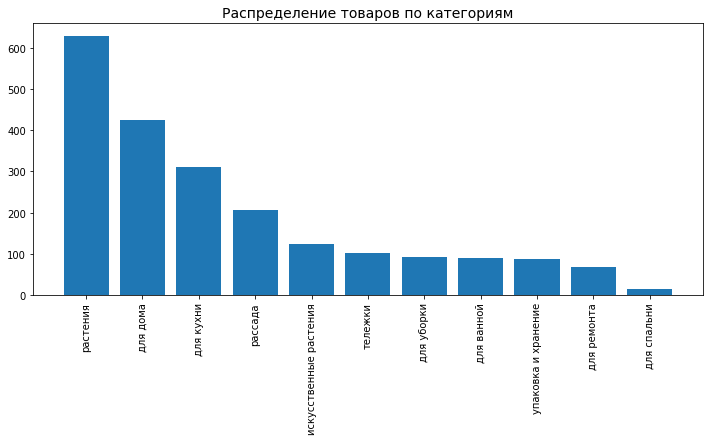

In [46]:
#визуализируем распределение товаров по категроиям 
plt.figure(figsize=(12,5))
plt.bar(products_category['category'], products_category['goods_count'])
plt.xticks(rotation=90)
plt.title('Распределение товаров по категориям', fontsize=14)
plt.show()

Максимальное число товаров в категориях:
1. растения
2. товары для дома
3. товары для кухни
4. рассада
4. искусственные растения

### Проведем анализ метрик с учетом категорий товаров.

Определим top5 категорий товаров - лидеров продаж по числу покупок и общей стоимости

In [47]:
top_category = ecommerce.groupby('category').agg({'amount': 'sum', 'quantity': 'sum'}).reset_index()
top_category.columns = ['category', 'total_amount', 'total_items']

#выводим топ5 категорий по выручке 
top_category.sort_values(by='total_amount', ascending=False, inplace=True)
top_category.head()

,category,total_amount,total_items
1,для дома,890109.0,1236
9,тележки,619408.0,321
8,растения,352768.0,2467
2,для кухни,301961.0,992
10,упаковка и хранение,138262.0,216


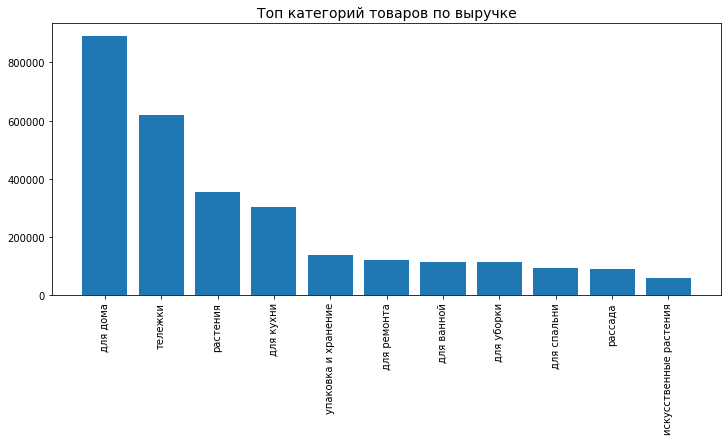

In [48]:
#визуализируем Топ категорий товаров по выручке
plt.figure(figsize=(12,5))
plt.bar(top_category['category'], top_category['total_amount'])
plt.xticks(rotation=90)
plt.title('Топ категорий товаров по выручке', fontsize=14)
plt.show()

Наибольшую выручку приносят категории:

1. для дома
2. тележки
3. растения
4. для кухни
5. упаковка и хранение

In [49]:
#выводим топ5 категорий по числу проданных товаров
top_category.sort_values(by='total_items', ascending=False, inplace=True)
top_category.head()

,category,total_amount,total_items
8,растения,352768.0,2467
6,искусственные растения,58350.0,1245
1,для дома,890109.0,1236
2,для кухни,301961.0,992
7,рассада,90416.0,756


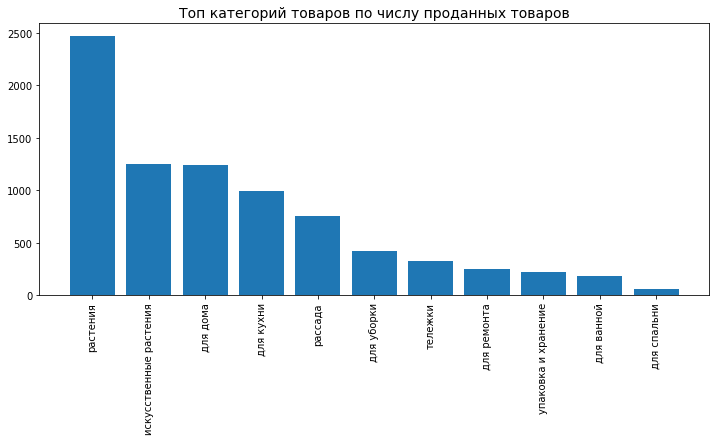

In [50]:
#визуализируем Топ категорий по числу проданных товаров
plt.figure(figsize=(12,5))
plt.bar(top_category['category'], top_category['total_items'])
plt.xticks(rotation=90)
plt.title('Топ категорий товаров по числу проданных товаров', fontsize=14)
plt.show()

При этом лидеры по числу проданных единиц товара:

1. растения
2. искусственные растения
3. товары для дома
4. товары для кухни
5. рассада

Посчитаем средний чек по категориям. 


In [51]:
amount_category = ecommerce.groupby(['order_id', 'category']).agg({'amount': 'sum'}).reset_index()
amount_category = amount_category.groupby('category').agg({'amount': 'mean'}).reset_index()
amount_category.sort_values(by='amount', ascending=False, inplace=True)
amount_category

,category,amount
4,для спальни,6092.533333
9,тележки,1998.090323
3,для ремонта,1566.701299
1,для дома,1344.575529
10,упаковка и хранение,1191.913793
5,для уборки,1041.101852
0,для ванной,954.883333
2,для кухни,952.558360
7,рассада,706.375000
8,растения,534.496970


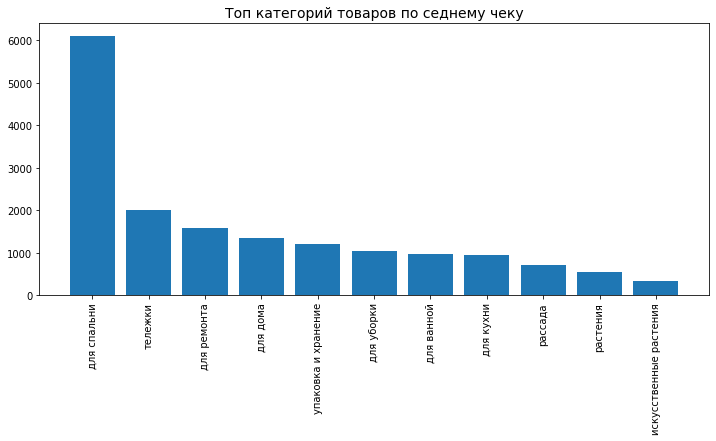

In [52]:
#визуализируем Топ категорий по среднему чеку 
plt.figure(figsize=(12,5))
plt.bar(amount_category['category'], amount_category['amount'])
plt.xticks(rotation=90)
plt.title('Топ категорий товаров по седнему чеку', fontsize=14)
plt.show()

С большим отрывом лидируют товары для спальни. Затем идут сумки и тележки, товары для ремонта, товары для дома и упаковка/хранение.

Проверим сезонность для отдельных категорий, которые приносят наибольшую выручку.

In [53]:
#функция для визуализации графика сезонности по категориям 
def check_seasons(category_name):
    df = (ecommerce.query('category == @category_name')
                .groupby('month')
                .agg({'quantity': 'sum'})
                .reset_index()
                .sort_values(by='month')
         )

    plt.figure(figsize=(12,5))
    plt.bar(df['month'], 
            df['quantity']
           )
    plt.title('Продажи по месяцам в категории - ' + category_name)
    plt.show()

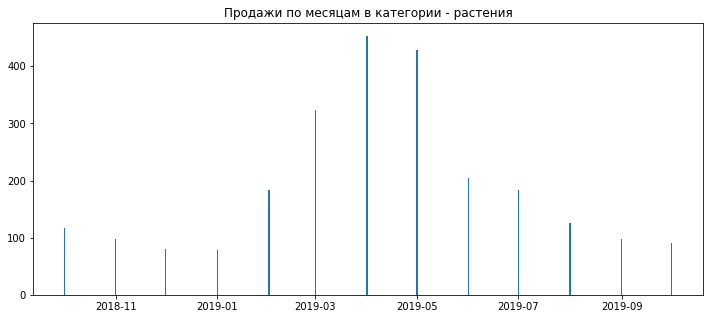

In [54]:
check_seasons('растения')

Пик сезона категории "растения" приходится на апрель-май. В остальные месяца - спад. 

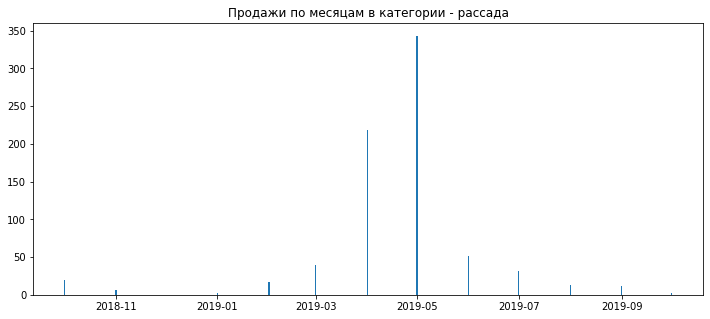

In [55]:
check_seasons('рассада')

Пик сезона категории "рассада" приходится на май. В остальные месяца - полный спад. В некоторые месяца вообще нет продаж.

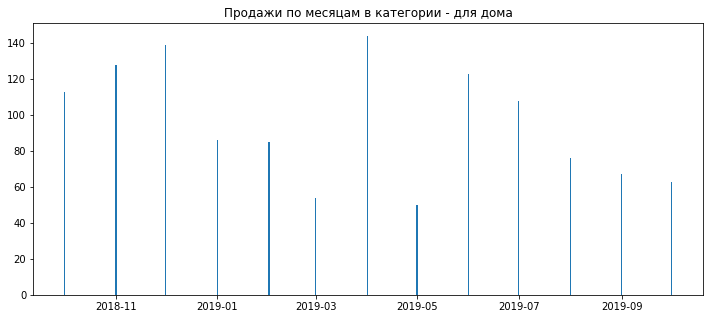

In [56]:
check_seasons('для дома')

Выраженной сезонности "Товаров для дома" нет. Небольшой спад интереса можно заметить в мае. Больше всего продаж в апреле и декабре. 

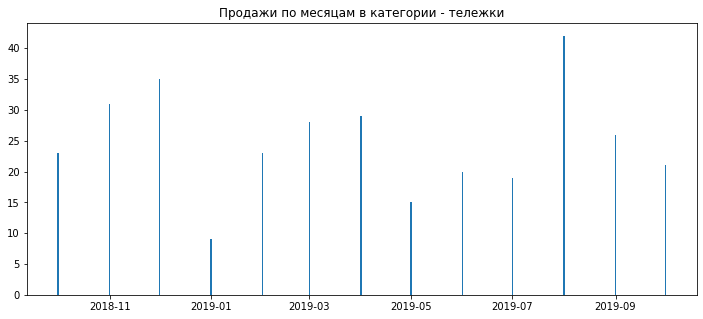

In [57]:
check_seasons('тележки')

Выраженной сезонности по тележкам нет нет. Особенные спад в январе. Больше всего продаж в августе.

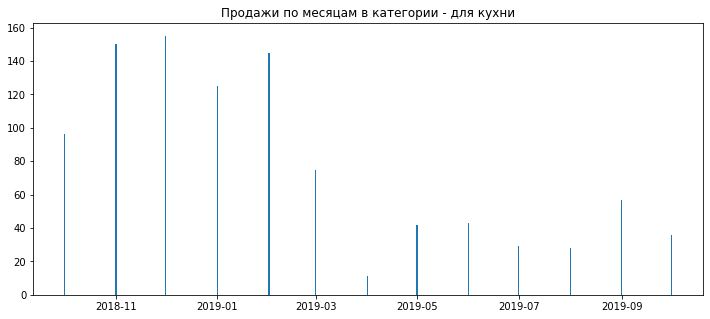

In [58]:
check_seasons('для кухни')

По категории "товары для кухни" можно заметить пик сезона с октября по март. И спад активности продаж с апреля по октябрь.

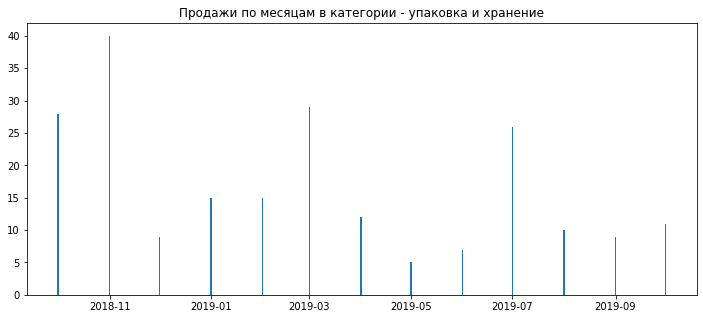

In [59]:
check_seasons('упаковка и хранение')

Выраженная сезонность не наблюдается. Пик продаж можно заметить в ноябре.

**Вывод:**
Особенно сильно выражена сезонность продаж в категориях Растения и Рассада. Также ее можно заметить в категории товаров для кухни. 

### Выводы:

1. Повторные покупки не характерны. 
2. Большенство покупателей совершают только один заказ.
3. Если рассматривать продажи в целом без учета категорий товаров, то сезонности нет. Но если учитывать категории товаров, то сезонность есть в категориях Растения и Рассада - весной продажи заметно растут.
4. Заказы равномерно распределены по всем дням недели.
5. В большенстве заказов всего один товар.
6. Средний чек - 1130 руб. При этом 75% заказов с чеком до 1350 руб

По данным заказов сформированы товарные категории:
- растения
- рассада
- искусственные растения
- товары для дома
- товары для кухни
- товары для ванной
- товары для спальни
- товары для уборки
- упаковка и хранение
- тележки
- товары для ремонта

Максимальное число товаров в категориях:
- растения
- товары для дома
- товары для кухни
- рассада
- искусственные растения

Наибольшую выручку приносят категории:
- для дома
- тележки
- растения
- для кухни
- упаковка и хранение

При этом лидеры по числу проданных единиц товара:
- растения
- искусственные растения
- товары для дома
- товары для кухни
- рассада


## Сегментация пользователей.

Выделим сегменты покупателей:

- по числу заказов на одного покупателя.
- по категориям товаров
- по среднему чеку.

Построим матрицу признаков для покупателей.

In [60]:
#сгруппируем данные по заказам
orders_grouped = ecommerce.groupby(['customer_id',
                                 'order_id']
                               ).agg({'quantity': 'sum', 
                                      'amount': 'sum'}
                                    ).reset_index()

orders_grouped.columns = ['customer_id', 'order_id', 'items_count', 'total_amount']


In [61]:
# ср. число товаров в заказе, общая стоимость всех заказов, ср. стоимость заказа
orders_grouped = orders_grouped.groupby('customer_id').agg({'items_count': 'mean', 
                                                            'total_amount':['sum', 'mean']}
                                                          ).reset_index()

orders_grouped.columns = ['customer_id', 'avg_items', 'orders_total_amount', 'orders_avg_amount']
orders_grouped.head()

,customer_id,avg_items,orders_total_amount,orders_avg_amount
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4.0,555.0,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,1.0,442.0,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2.0,914.0,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1.0,1649.0,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2.0,2324.0,2324.0


In [62]:
customers = ecommerce.groupby('customer_id').agg({'order_id': 'nunique', 'category': 'nunique', 'date': 'max'}).reset_index()
customers.columns = ['customer_id', 'orders', 'category', 'last_order_date']
customers.head()

,customer_id,orders,category,last_order_date
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,1,2019-10-16
1,001cee7f-0b29-4716-b202-0042213ab038,1,1,2019-02-16
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1,2019-10-14
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1,2019-01-27
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1,2019-09-29


In [63]:
customers = pd.merge(customers, orders_grouped, on='customer_id')
customers.head()

,customer_id,orders,category,last_order_date,avg_items,orders_total_amount,orders_avg_amount
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,1,2019-10-16,4.0,555.0,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,1,2019-02-16,1.0,442.0,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1,2019-10-14,2.0,914.0,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1,2019-01-27,1.0,1649.0,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1,2019-09-29,2.0,2324.0,2324.0


In [64]:
# посчитаем число дней с даты последнего заказа

# за точку отсчета берем макс. дату заказа + 1 день
max_date = ecommerce['date'].max() + pd.Timedelta('1d')

customers['no_order_days'] = customers['last_order_date'].apply(lambda x: (max_date - x).days)
# ненужный столбец удаляем
customers.drop(['last_order_date'], axis=1, inplace=True)
customers.head()

,customer_id,orders,category,avg_items,orders_total_amount,orders_avg_amount,no_order_days
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,1,4.0,555.0,555.0,16
1,001cee7f-0b29-4716-b202-0042213ab038,1,1,1.0,442.0,442.0,258
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1,2.0,914.0,914.0,18
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1,1.0,1649.0,1649.0,278
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1,2.0,2324.0,2324.0,33


In [65]:
customers.describe()

,orders,category,avg_items,orders_total_amount,orders_avg_amount,no_order_days
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1.077917,1.064583,3.080263,1204.301250,1114.674906,204.573333
std,0.330743,0.293737,4.834733,1990.758951,1540.709818,110.643958
min,1.000000,1.000000,1.000000,14.000000,14.000000,1.000000
25%,1.000000,1.000000,1.000000,296.000000,276.875000,110.000000
50%,1.000000,1.000000,1.000000,675.500000,652.000000,212.000000
75%,1.000000,1.000000,2.000000,1481.500000,1349.250000,295.000000
max,7.000000,5.000000,30.000000,53232.000000,26616.000000,396.000000


Посмотрим на распределения признаков клиентов

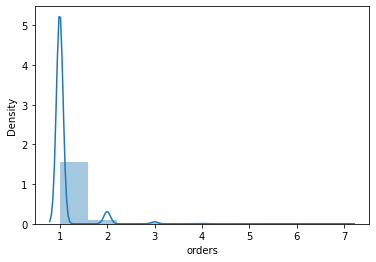

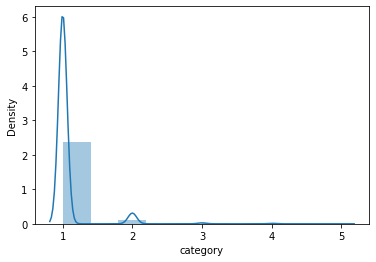

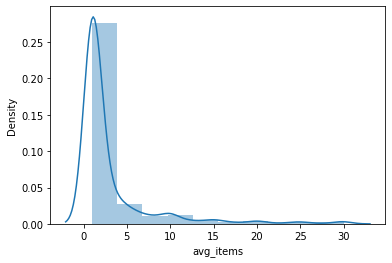

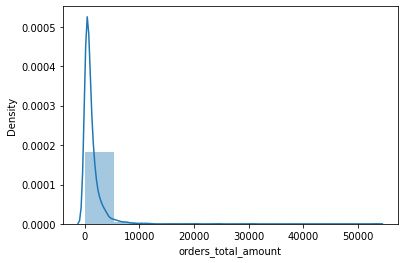

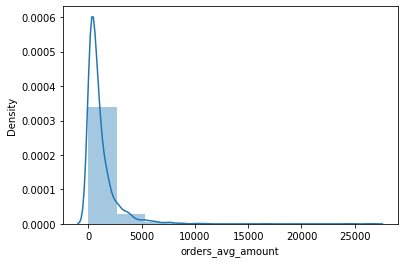

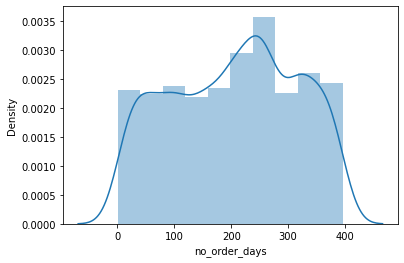

In [66]:
for col in customers.drop(['customer_id'], axis=1).columns:
  sns.distplot(customers[col], bins = 10)
  plt.show()

Построим тепловую карту для корреляции признаков.

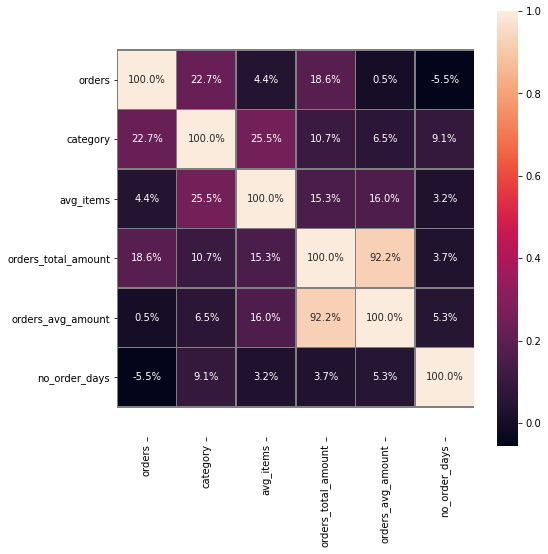

In [67]:
#построим и отрисуем матрицу корреляций
cm = customers.drop(['customer_id'], axis=1).corr()
fig = plt.figure(figsize=(8,8))
# тепловая карта для матрицы корреляций
sns.heatmap(cm, 
            annot=True, 
            square=True,
            linewidths=.5, 
            linecolor='gray',
            fmt='.1%'
           )

# фикс кривизны отрисовки карты
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.show()

Взаимосвязи можно выявить по тепловой карте:

- кол-во категорий, в которых покупатель выбирал товары, связано с числом заказов на покупателя
- ср. число товаров в заказе связано с общей стоимостью заказов
- ср. чек связан с общей суммой по заказам. Т.к. тут связь сильная, то один из параметров стоит исключить из дальнейшего рассмотрения.

In [68]:
# уберем orders_total_amount из матрицы признаков
customers.drop(['orders_total_amount'], axis=1, inplace=True)

Сделаем кластеризацию покупателей с использованием машинного обучения. Предварительно построим дендрограмму и выберем оптимальное число кластеров

In [69]:
# стандартизируем данные 
scaler = StandardScaler()
X_sc = scaler.fit_transform(customers.drop(columns = ['customer_id']))

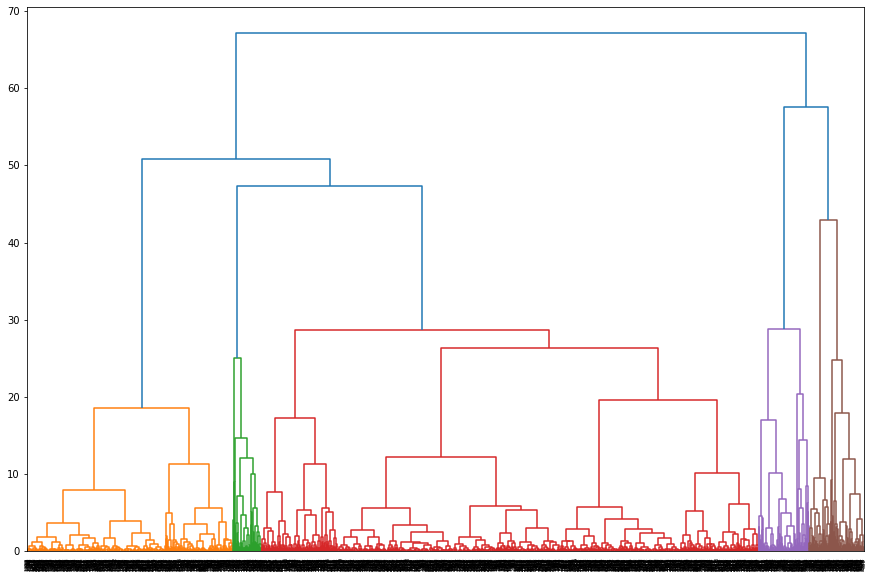

In [70]:
# дендрограмма
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

In [71]:
# прогнозирование кластеров покупателей
km = KMeans(n_clusters = 2, random_state = 0) # задаём число кластеров, равное 2
labels = km.fit_predict(X_sc)

In [72]:
customers['cluster'] = labels
customers.head()

,customer_id,orders,category,avg_items,orders_avg_amount,no_order_days,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,1,4.0,555.0,16,1
1,001cee7f-0b29-4716-b202-0042213ab038,1,1,1.0,442.0,258,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,1,2.0,914.0,18,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1,1.0,1649.0,278,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1,2.0,2324.0,33,1


Сравним средние значения признаков по кластерам

In [73]:
customers.groupby('cluster').mean()

,orders,category,avg_items,orders_avg_amount,no_order_days
cluster,,,,,
0,1.334711,1.640496,13.145169,2003.321379,225.049587
1,1.049120,1.000000,1.951576,1015.021316,202.277108


Выделено 2 кластера, которые различаются:

- по числу заказов
- по среднему чеку
- по числу дней с последнего заказа

По этим кластерам покупателей можно строить маркетинговые активности для повышения LTV, ср. чек, реактивации покупателей.

**Вывод:** 

**Кластер 0:**
Среднее количество заказов - 13.
Средний чек заказа 2003 д.е.
Дней без заказов - 225.

**Кластер 1:**
Среднее количество заказов - 2.
Средний чек заказа 1015 д.е.
Дней без заказов - 202.



Проверим наличие связей между категориями товаров

In [74]:
# посчитаем в каких категориях и сколько товаров купил каждый покупатель
category = ecommerce.groupby(['customer_id', 'category']).agg({'quantity': 'sum'}).reset_index()
category.columns = ['customer_id', 'category_name', 'items_count']
category.head()

,customer_id,category_name,items_count
0,000d6849-084e-4d9f-ac03-37174eaf60c4,растения,4
1,001cee7f-0b29-4716-b202-0042213ab038,для дома,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,для дома,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,тележки,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,для дома,2


In [75]:
category_matrix = category.pivot_table(index = 'customer_id', 
                                       columns = 'category_name', 
                                       values='items_count', 
                                       aggfunc='sum')
category_matrix.fillna(0, inplace=True)
category_matrix.head()

category_name,для ванной,для дома,для кухни,для ремонта,для спальни,для уборки,искусственные растения,рассада,растения,тележки,упаковка и хранение
customer_id,,,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
001cee7f-0b29-4716-b202-0042213ab038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00299f34-5385-4d13-9aea-c80b81658e1b,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002d4d3a-4a59-406b-86ec-c3314357e498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
003bbd39-0000-41ff-b7f9-2ddaec152037,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


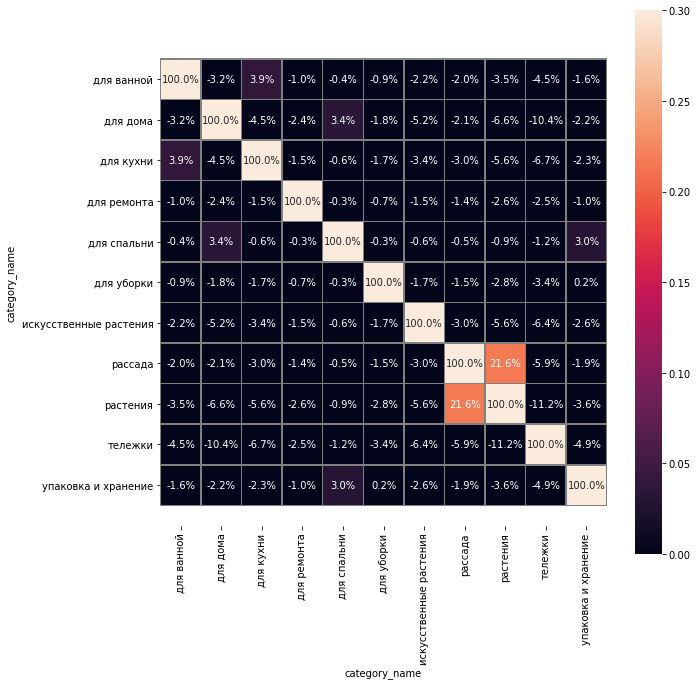

In [76]:
#построим и отрисуем матрицу корреляций
cm = category_matrix.corr()
fig = plt.figure(figsize=(10,10))
# тепловая карта для матрицы корреляций
sns.heatmap(cm, 
            annot=True, 
            square=True,
            linewidths=.5, 
            linecolor='gray',
            vmin=0,
            vmax=0.3,
            fmt='.1%'
           )

# фикс кривизны отрисовки карты
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.show()

Можно сделать вывод, что корреляция существует для категорий товаров: Растения и рассада
слабая между: Товары для дома и Тележки.

Внедрение рекомендательной системы должно, в первую очередь, исправить эту картину. Если покупателям будут показываться товары из связанных категорий, то должно увеличиться число заказов с товарами из рахных категорий, увеличится ср. чек.

Матрица category_matrix может использоваться для формирования персонализированных предложений клиентах на основе категорий их прошлых покупок.

### Вывод:
1. сформирована матрица признаков покупателей, проверены распределения и зависимости между признаками. Распределения признаков подтвердили выводы сделанные ранее.
2. с помощью методов машинного обучения выполнена кластеризация покупателей, выделены 2 сегмента, которые затем могут использоваться в маркетинговых активностях.
3. выявлены связи между категориями товаров. Хотя и большенство покупателей покупают товары только из одной категории, существует взаимосвязь между категоряими Растения и Рассада.

## Проверка гипотез.

Гипотеза №1.

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем чеке между сегментами покупателей.

**Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем чеке между между сегментами покупателей.

In [77]:
# Генерируем две независимые выборки. 
cluster0 = customers[customers['cluster']==0]['orders_avg_amount']
cluster1 = customers[customers['cluster']==1]['orders_avg_amount']

In [78]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(cluster0, cluster1) #alternative='two-sided'

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.6158117590054166e-24
Отвергаем нулевую гипотезу


**Вывод:** Таким образом, можно сделать выводы, что есть статистически значимое различие в среднем чеке между между сегментами покупателей.

Гипотеза №2.

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем числе заказов между сегментами покупателей.

**Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем числе заказов между сегментами покупателей.

In [79]:
avg_items_cluster0 = customers[customers['cluster']==0]['avg_items']
avg_items_cluster1 = customers[customers['cluster']==1]['avg_items']

In [80]:
# Выполним проверку гипотезы.
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(avg_items_cluster0, avg_items_cluster1) #alternative='two-sided'

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8068032642054455e-142
Отвергаем нулевую гипотезу


**Вывод:** Таким образом, можно сделать выводы, что есть статистически значимое различие в среднем числе заказов между сегментами покупателей.

## Выводы

### Профили потребления
Из анализа данных по заказам выявлены следующие особенности поведения покупателей:

1. более 93% покупателей сделали только один заказ. Одиночные заказы - это норма поведения покупателей, повторные заказы, в данном случае, исключительная ситуация. 
2. в более 85% заказов только одно наименование товара. Это может говорить о том, что нет рекомендательной системы. Покупатель ищет конкретный товар и ему не предлагаются связанные или дополнительные товары.
3. в продажах товаров категорий Растения и Рассада есть сезонность - весной продажи заметно растут.
4. дней с повышенным числом заказов не выявлено. Заказы равномерно распределены по всем дням недели.
5. средний чек - 1130 руб. При этом 75% заказов с чеком до 1350 руб.


6. Максимальное число товаров в категориях:
- растения
- товары для дома
- товары для кухни
- рассада
- искусственные растения


7. Наибольшую выручку приносят категории:
- для дома
- тележки
- растения
- для кухни
- упаковка и хранение


8. При этом лидеры по числу проданных единиц товара:
- растения
- искусственные растения
- товары для дома
- товары для кухни
- рассада


9. По среднему чек большим отрывом лидируют товары для спальни. Затем идут сумки и тележки, товары для ремонта, товары для дома и упаковка/хранение.

10. Сезонность: 
- Пик сезона категории "растения" приходится на апрель-май. В остальные месяца - спад. 
- Пик сезона категории "рассада" приходится на май. В остальные месяца - полный спад. В некоторые месяца вообще нет продаж. - - - Выраженной сезонности "Товаров для дома" нет. Небольшой спад интереса можно заметить в мае. Больше всего продаж в апреле и декабре.  
- Выраженной сезонности по тележкам нет нет. Особенные спад в январе. Больше всего продаж в августе.
- По категории "товары для кухни" можно заметить пик сезона с октября по март. И спад активности продаж с апреля по октябрь. 

### Сегменты покупателей

1. С помощью методов машинного обучения выполнена кластеризация покупателей выделены 2 сегмента, которые различаются:/
- по числу заказов
- по среднему чеку
- по числу дней с последнего заказа По этим кластерам покупателей можно строить маркетинговые активности для повышения LTV, ср. чек, реактивации покупателей.

**Кластер 0:** Среднее количество заказов - 13. Средний чек заказа 2003 д.е. Дней без заказов - 225.

**Кластер 1:** Среднее количество заказов - 2. Средний чек заказа 1015 д.е. Дней без заказов - 202.

2. Выявлены связи между категориями товаров. Хотя и большинство покупателей покупают товары только из одной категории, существует взаимосвязь между категориями Растения и Рассада.

### Проверка гипотез 

1. Есть статистически значимое различие в среднем чеке между между сегментами покупателей.
2. Есть статистически значимое различие в среднем числе заказов между сегментами покупателей.

## Рекомендации

1. выполнить дополнительный анализ поведения покупателей, выявить причины низкого числа повторных покупок. 
2. внедрить рекомендательную систему, проанализировать структуру каталога, навигацию, поиск и т.д. влияющие на поведение клиента при поиске товары. Клиенты выбирают один товар из одной категории - это плохой показатель и это сказывается на низком ср. чеке и ср. выручке заказа.
3. формировать персонализированные предложения на основе сформированных сегментов покупателей.

## Дополнительные материалы 

* [Презентация] (https://drive.google.com/file/d/1pGh_2QBfgE8ZcVXM3_AxTM4X9_ytmAyl/view?usp=sharing)

* [Дашборд] (https://public.tableau.com/app/profile/viktoriya.shivakova/viz/E-commerce_16583854164550/e-commerce?publish=yes)